<img src="images/cads-logo.png" width=200 align=left>
<img src="images/python-logo.png" width=200 align=right>

In [202]:
%matplotlib inline
import seaborn as sns
# Visualization
import matplotlib.pyplot as plt 

#table
import pandas as pd 

# array
import numpy as np 

# At the time of creating this material, there was a versioning issue 
# between seaborn and numpy that results in a FutureWarning. This does 
# not affect the results and will presumably be fixed in some update cycle 
# but creates an annoying warning message we don't want to see every time.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Seaborn built on top of matplotlib

# Visualization with Seaborn
- [Visualization with Seaborn](#Visualization-with-Seaborn)
- [Introduction](#Introduction)
- [Relationships Between Continuous Variables](#Relationships-Between-Continuous-Variables)
    - [Scatter plots](#Scatter-plots)
    - [Line plots](#Line-plots)
        - [Aggregating Data](#Aggregating-Data)
        - [Plotting Dates](#Plotting-Dates)
    - [Exercises](#Exercises)
- [Relationships to Categorical Variables](#Relationships-to-Categorical-Variables)
    - [Categorical Scatter Plots](#Categorical-Scatter-Plots)
    - [Distribution Plots](#Distribution-Plots)
    - [Exercises](#Exercises)
- [Element Ordering](#Element-Ordering)
- [Facetting](#Facetting)
- [Under the Hood](#Under-the-Hood)
- [Customizing Plots](#Customizing-Plots)
    - [Plot Text and Axis Labels](#Plot-Text-and-Axis-Labels)
    - [Axis Limits](#Axis-Limits)
    - [Color](#Color)
- [Themes](#Themes)
- [Saving Plots](#Saving-Plots)
- [Exercises](#Exercises)

Jamboard:https://jamboard.google.com/d/1qDF1447yQP_oZRe0iSucwvU_BtfBIBJNN_uCjmtlCFo/viewer

## Introduction
The base library for visualization in Python is `matplotlib`. Nearly every other library for visualizing data is built on top of it. However, despite being incredibly flexible and powerful, `matplotlib` is difficult to use for data analysis. Instead of being developed with one single API design, it has grown organically as every new update needed to ensure backwards compatibility with old code (otherwise all libraries building on it would break until updated). This continuity is part of what makes it so attractive and simultaneously complicated.

Furthermore, `matplotlib` is designed to visualize *anything*, not just data. Because we're most interested in examining and presenting relationships between data, however, **we will use a different library, `seaborn`**. This library is <u>specifically designed for statistical data visualization</u> and provides a consistent and easy-to-use API.

## Relationships Between Continuous Variables
Visualizing the relationship between continuous variables is as simple as plotting the values of both variables for each data entry on the x- and y-axes of a plot.

D:\Users\Faiz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


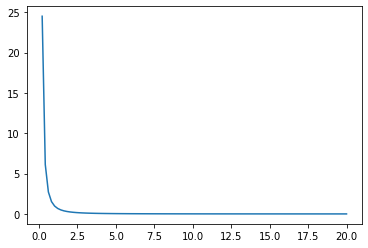

In [13]:
# Sample when using plt
x=np.linspace(0,20,100)
y = 1/x**2

plt.plot(x,y)

### Scatter plots

In [21]:
# These two lines are equivalent except that seaborn downloads a dataset
# while pandas loads a local dataset (in this instance).
# We'll use a pre-downloaded version to avoid internet woes
# tips = sns.load_dataset("tips")
tips = pd.read_csv("data/tips.csv")
tips.head()
# tips.describe()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


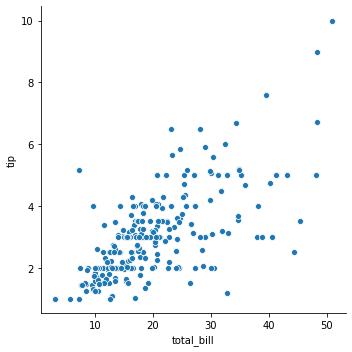

In [19]:
sns.relplot(x="total_bill", y="tip", data=tips)

We may, of course, be interested in more than just the x- and y- values. We can use additional arguments to `relplot(...)` to distinguish data points

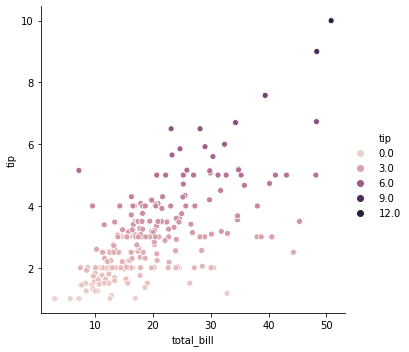

In [26]:
# Hue
sns.relplot(x="total_bill", y="tip",hue="tip", data=tips)

Points are now colored differently depending on whether the entry in the dataset corresponds to a smoker or not. We can do the same for the size and style aesthetics as well.

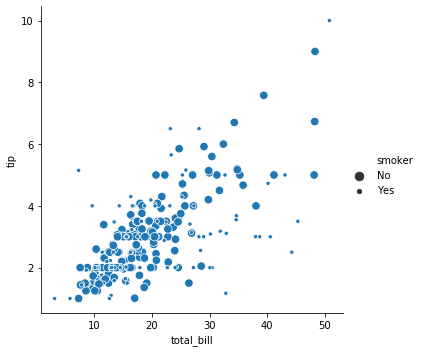

In [28]:
# Size
sns.relplot(x="total_bill", y="tip",size = "smoker", data=tips)

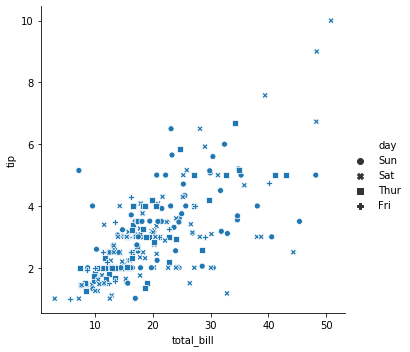

In [32]:
# style
sns.relplot(x="total_bill", y="tip",style = "day", data=tips)

The aesthetic mappings can be combined as desired to visualize up to 5 dimensions in our datasetsvia the `x`, `y`, `hue`, `shape`, and `size` arguments.

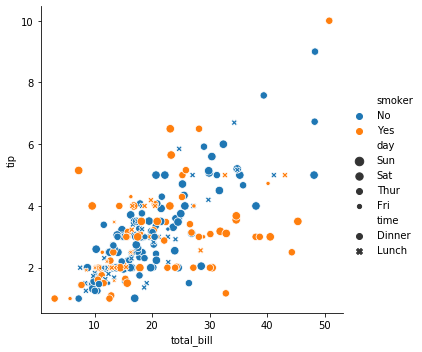

In [33]:
sns.relplot(x="total_bill", y="tip", hue="smoker", size="day", style="time", data=tips)

Be warned that this will make plots extremely difficult to visualize parse.

The `hue` and `size` aesthetics have been categorical so far, meaning that distinct colors and sizes were chosen for each possible, discrete value of the dataframe columns they were applied to. They can also be applied to continuous, numerical variables. In this case, the color palette will automatically be set to a gradient. We will see further on how to customize colors.

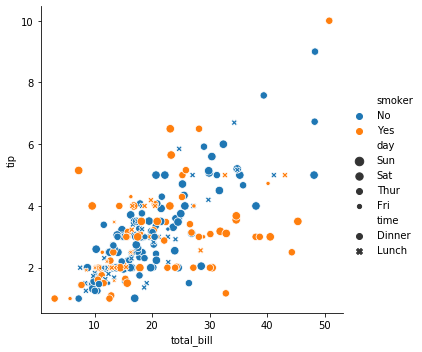

In [36]:
# default : sns.relplot(x="total_bill", y="tip", hue="size", data=tips)
sns.relplot(x="total_bill", y="tip", hue="smoker",size='day',style='time', data=tips)


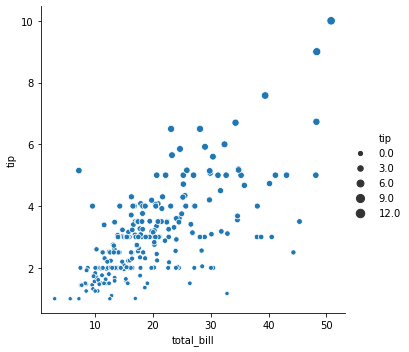

In [38]:
# kind :scatter
sns.relplot(x="total_bill", y="tip", size="tip", data=tips, kind="scatter")

### Line plots
By default, `seaborn` will create a scatterplot. In the case of time series, we may be interested in creating a line plot **to better visualize trends**. We can do this by simply adding a `kind="line"` argument (by default, this argument is `kind="scatter"`).

In [50]:
np.random.seed(10)

df = pd.DataFrame({
    "time": np.arange(500),
    "value": np.random.randn(500).cumsum()}) # random normal distribution: cumulative sum
df

,time,value
0,0,1.331587
1,1,2.046865
2,2,0.501465
3,3,0.493081
4,4,1.114417
...,...,...
495,495,16.245035
496,496,16.301349
497,497,16.847134
498,498,16.164011


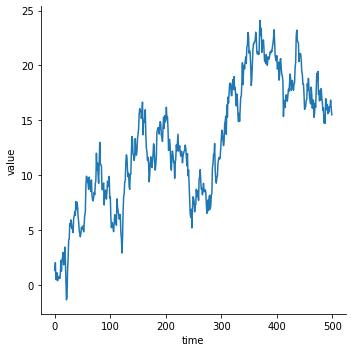

In [51]:
sns.relplot(x="time", y="value",kind="line",data=df)

By default, the dataframe will be sorted so that the x-values are in ascending order. This ensures that the line plot looks like a timeseries plot. This can, however, be disabled by setting `sort=False`. This could be useful, for example, if we are following the movement of an object or tracking how two variables change simultaneously through time.

In [57]:
np.random.seed(10)

df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])


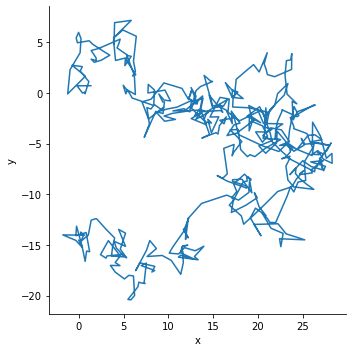

In [55]:
# by default sort from lowest to highest for x(usually time)
sns.relplot(x="x", y="y", sort=False, kind="line", data=df)

Line plots have the same aesthetic mapping possibilities as scatter plots, `hue`, `size`, and `shape`, and they can also be combined in the same way. Notice how multiple lines are created and only points with the identical mapped aesthetics are connected. That means, if we create a line plot that maps a variable to `hue` and to `style`, we will end up with an individual line for each existing combination of variables in our data.

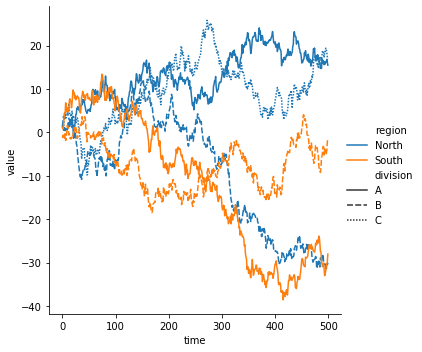

In [60]:
np.random.seed(10)

df = pd.DataFrame({
    "time": np.arange(500),
    "value": np.random.randn(500).cumsum(), 
    "region": "North", "division": "A"})
df = df.append(pd.DataFrame({
    "time": np.arange(500),
    "value": np.random.randn(500).cumsum(), 
    "region": "North", "division": "B"}))
df = df.append(pd.DataFrame({
    "time": np.arange(500),
    "value": np.random.randn(500).cumsum(), 
    "region": "North", "division": "C"}))
df = df.append(pd.DataFrame({
    "time": np.arange(500),
    "value": np.random.randn(500).cumsum(), 
    "region": "South", "division": "A"}))
df = df.append(pd.DataFrame({
    "time": np.arange(500),
    "value": np.random.randn(500).cumsum(), 
    "region": "South", "division": "B"}))

# df.head() # to visualize the data

sns.relplot(
    x="time", y="value", kind="line", hue="region", 
    style="division", data=df)

In [61]:
df.head()

,time,value,region,division
0,0,1.331587,North,A
1,1,2.046865,North,A
2,2,0.501465,North,A
3,3,0.493081,North,A
4,4,1.114417,North,A


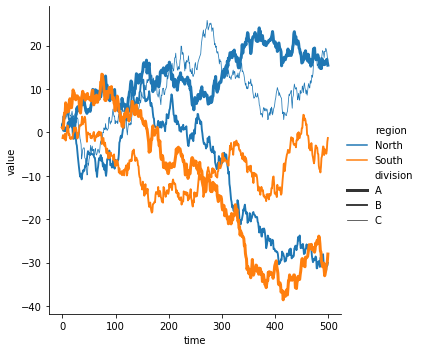

In [62]:
# Using size instead of style

sns.relplot(x="time", y="value", kind="line", hue="region", size="division", data=df)

If using the `style` parameter, we can also decide whether we want dashes, dots, or both.

In [64]:
np.random.seed(10)

df = pd.DataFrame({
    "time": np.arange(20),
    "value": np.random.randn(20).cumsum(), 
    "region": "North"})
df = df.append(pd.DataFrame({
    "time": np.arange(20),
    "value": np.random.randn(20).cumsum(), 
    "region": "South"}))

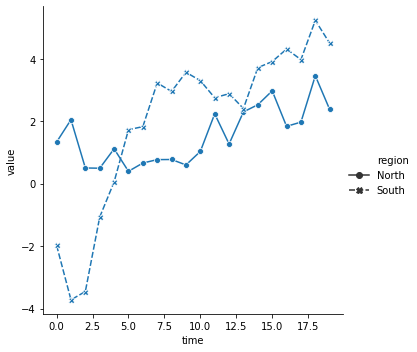

In [69]:
# markers = True - point on the line
sns.relplot(x="time", y="value", kind="line", 
            style="region", markers=True, data=df)

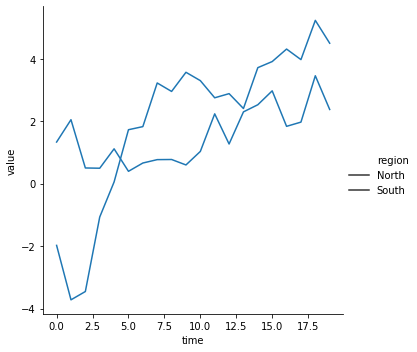

In [70]:
# Dashes = false - remove the dash
sns.relplot(x="time", y="value", kind="line", style="region", 
            dashes=False, data=df)

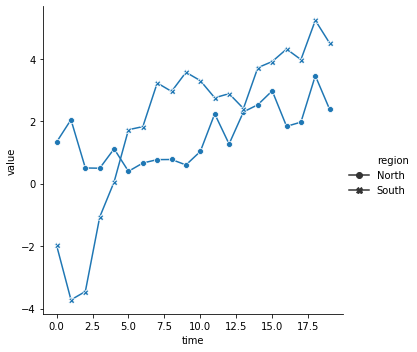

In [72]:
# no dashes but with marker
sns.relplot(x="time", y="value", kind="line", style="region", 
            dashes=False, markers=True, data=df)

# marker and dashes only for style

#### Aggregating Data
Often, we may have data with multiple measurements for the same data point, i.e. x-value. For example, we might have several temperature sensors in a device as a failsafe. `seaborn` can automatically aggregate y-values for identical x-values. By default, it plots the mean and the 95% confidence interval around this mean in either direction.

In [73]:
# fmri = sns.load_dataset("fmri")
fmri = pd.read_csv("data/fmri.csv")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [75]:
fmri.loc[(fmri["timepoint"] == 18)].head(10)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513
6,s8,18,stim,parietal,-0.064408
7,s7,18,stim,parietal,-0.060526
8,s6,18,stim,parietal,-0.007029
9,s5,18,stim,parietal,-0.040557
10,s4,18,stim,parietal,-0.048812


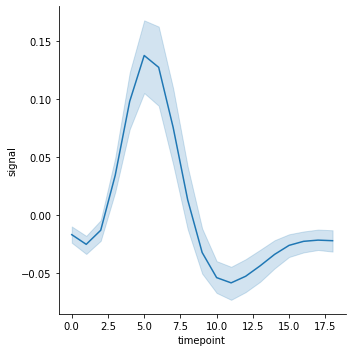

In [78]:
# by default the estimator  = np.mean
# all the point will be aggfrigated if using line
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

Because `seaborn` uses bootstrapping to compute the confidence intervals and this is a time-consuming process, it may be better to either switch to the standard deviation (`ci="sd"`) or turn this off entirely and only plot the mean (`ci=None`)

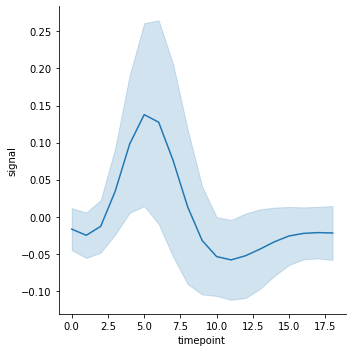

In [79]:
# ci = sd
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)

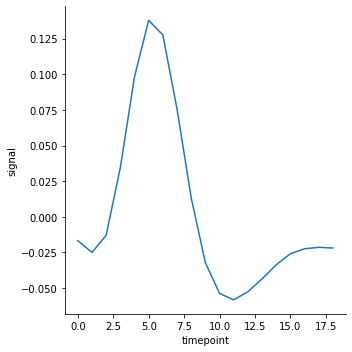

In [80]:
# ci=none
sns.relplot(x="timepoint", y="signal", kind="line", ci=None, data=fmri)

We can also change our `estimator` to any aggregation function, such as `np.median(...)`, `np.sum(...)`, or even `np.max(...)`. If we want to turn off aggregation then we just set `estimator=None`. Note that this will plot all measurements and cause the data to be plotted in strange ways.

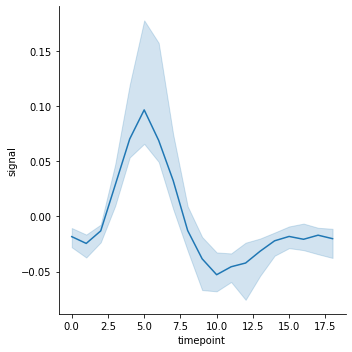

In [81]:
# estimator - default is the mean
# chg the estimnator to the median
sns.relplot(x="timepoint", y="signal", kind="line", 
            estimator=np.median, data=fmri)

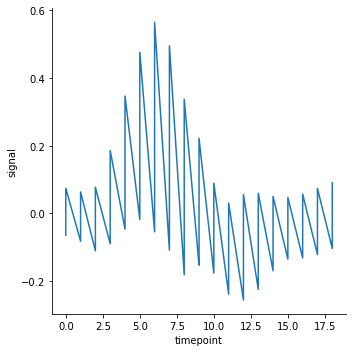

In [83]:
# no estimator
sns.relplot(x="timepoint", y="signal", kind="line", 
            estimator=None, data=fmri)

#### Plotting Dates
Because they're so ubiquitous, `seaborn` natively supports the date format and will automatically format plots accordingly.

In [87]:
pd.date_range("2017-1-1", periods=5)

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05'],
              dtype='datetime64[ns]', freq='D')

In [93]:
pd.date_range("1-1-2017", "22-3-2017")

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
               '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
               '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
               '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01',
               '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13',
               '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17',
               '2017-02-18', '2017-02-19', '2017-02-20', '2017-02-21',
               '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-25',
      

In [94]:
np.random.seed(10)

df = pd.DataFrame({
    "time": pd.date_range("2017-1-1", periods=500),
    "value": np.random.randn(500).cumsum()})
df.head()

,time,value
0,2017-01-01,1.331587
1,2017-01-02,2.046865
2,2017-01-03,0.501465
3,2017-01-04,0.493081
4,2017-01-05,1.114417


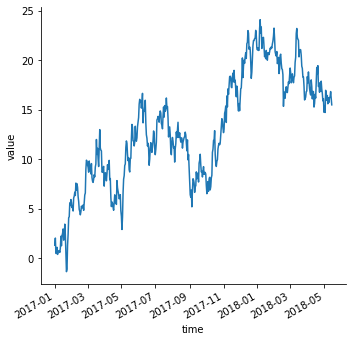

In [98]:
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

### Exercises
1. Load the `iris.csv` dataset and create a scatter plot relating the <u>petal length</u> to the <u>petal width</u>.

In [ ]:
### 

In [102]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


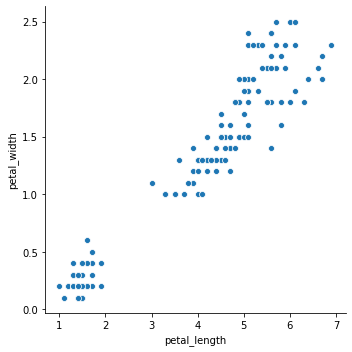

In [103]:
sns.relplot(x= "petal_length",y="petal_width",data=iris)

2. Load the `diamonds.csv` dataset. Plot the carats versus the price again, but this time make sure that points are colored based on the cut.

In [ ]:
###

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


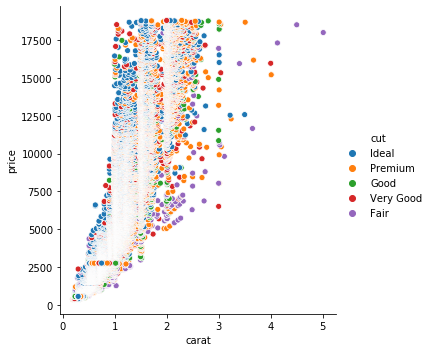

In [107]:
diamonds = pd.read_csv('data/diamonds.csv')
display(diamonds.head())
sns.relplot(x="carat",y="price",hue='cut',data=diamonds)

3. Load the `mpg.csv` dataset (from this folder) and create a line plot relating the mean `mpg` to the `model_year`. Make sure each country of `origin` is shown in a separate line style.

In [ ]:
###

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


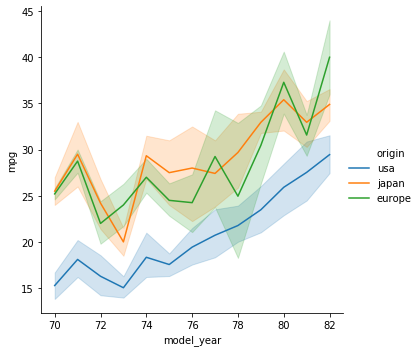

In [117]:
mpg = pd.read_csv("data/mpg.csv")
display(mpg.head())
sns.relplot(y="mpg",x="model_year",estimator=np.mean,hue="origin",kind="line",data=mpg)

4. This time, use `pandas` to find the mean `mpg` value for each `model_year` and each country of `origin`. Create a line plot relating the mean `mpg` to the `model_year` with one line for each country of `origin`, as above.

  *Hint*: Remember `groupby`? Remember how we can use it for multiple columns simultaneously?
  
  *Note*: `seaborn` cannot use the index, even if it is named. You must use `*.reset_index()` to ensure that the columns you grouped by are columns in the new data frame

In [ ]:
###

,model_year,origin,mpg
0,70,europe,25.200000
1,70,japan,25.500000
2,70,usa,15.272727
3,71,europe,28.750000
4,71,japan,29.500000


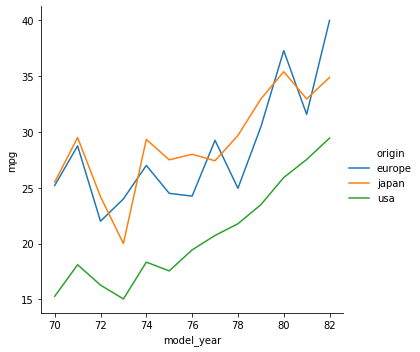

In [126]:
df = mpg.groupby(["model_year","origin"])["mpg"].mean().reset_index()
display(df.head())
sns.relplot(y="mpg",x="model_year",hue="origin",kind="line",data=df)

5. Consider the following (fake) stock data. Create a line plot from this data with one line for each stock symbol and format the x-axis as a date.

In [127]:
###
np.random.seed(101)

stock_data = pd.DataFrame({
    "time": pd.date_range("2017-1-1", periods=500),
    "value": np.random.randn(500).cumsum(), 
    "symbol": "TRDS"})
stock_data = stock_data.append(pd.DataFrame({
    "time": pd.date_range("2017-1-1", periods=500),
    "value": np.random.randn(500).cumsum(), 
    "symbol": "RISL"}))
stock_data.head()

,time,value,symbol
0,2017-01-01,2.706850,TRDS
1,2017-01-02,3.334983,TRDS
2,2017-01-03,4.242952,TRDS
3,2017-01-04,4.746778,TRDS
4,2017-01-05,5.397896,TRDS


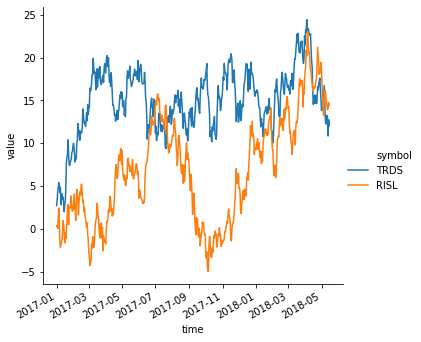

In [130]:
g= sns.relplot(x = "time", y = "value", hue= "symbol",kind="line",data= stock_data)
g.fig.autofmt_xdate()

## Relationships to Categorical Variables
We've already seen how we can show dependence on categorical variables with the various aesthetics in the previous section (`hue`, `size`, and `style`). Often, we may not have two continuous variables to relate to each other, though. For this, we use the `seaborn` function `catplot(...)` which can create multiple kinds of categorical plots.

### Categorical Scatter Plots
The simplest way to represent the relationship between continuous and categorical data is with a categorical scatter plot that represents the distribution of (continuous) values for each category. For this, we can make use of the default value `kind="strip"`.

Categorical : (not in original file)
- nominal 
    - no order
- ordinal 
    - there is order
    - example: (gold, silver,bronze)
    
one hot encoding
- dummy variable (every caategory into new column)

In [131]:
# tips = sns.load_dataset("tips")
tips = pd.read_csv("data/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


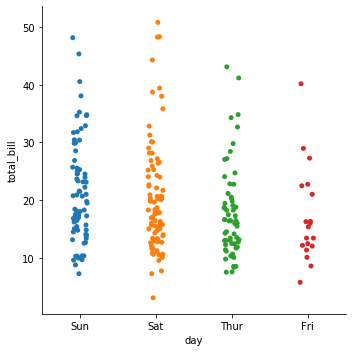

In [134]:
sns.catplot(x="day", y="total_bill", data=tips)

`seaborn` automatically adds jitter to the points to reduce their overlap. We can adjust this jitter by passing a value between 0 and 1 (exclusive) or eliminate this jitter entirely by passing a boolean `False`. Note that a value of 1 is interpreted as `True` and the default jitter width is used!

jitter - extra spacing

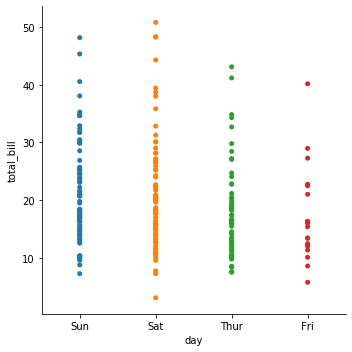

In [135]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

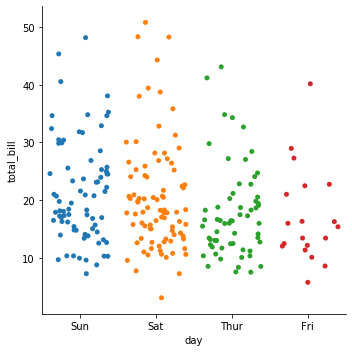

In [151]:
# When a number is passed, this corresponds to a relative width
# jitter=0.5 will typically mean that the "point columns" touch.

sns.catplot(x="day", y="total_bill", jitter=0.4, data=tips)

We can also prevent point overlap entirely by using a swarm plot. This will create a useful visual approximateion of the distribution of the values.

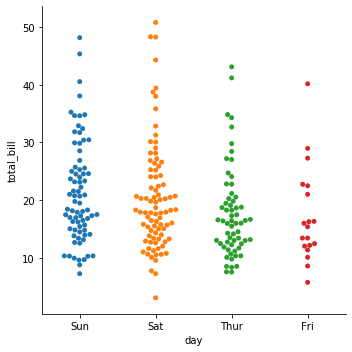

In [153]:
# kind = “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”.
# kind= swarm

sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

Categorical plots <u>only support the `hue`</u> aesthetic, <u>not the `style` or `size` </u>aesthetics.

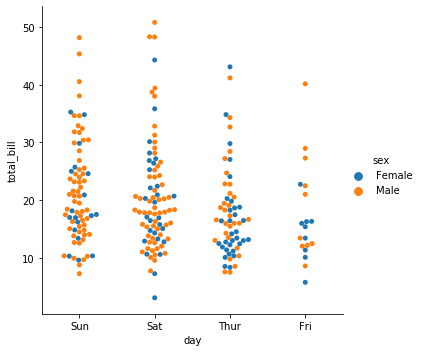

In [154]:
# hue = sex
sns.catplot(x="day", y="total_bill", kind="swarm", hue="sex", data=tips)

`seaborn` will make assumptions on the nature of your data. For example, if you pass two continuous, numerical variables to `catplot(...)`, it will try to treat the x-axis as a categorical variable.

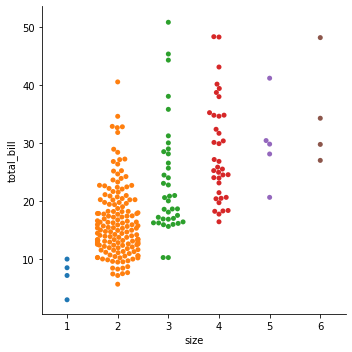

In [158]:
# chg the x  - if catplot, will assume x categorical
sns.catplot(x="size", y="total_bill", kind="swarm", data=tips)

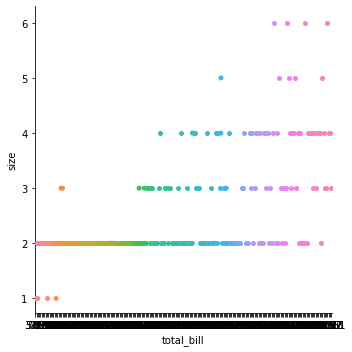

In [157]:
#swap x and y
sns.catplot(x="total_bill", y="size", kind="swarm", data=tips)

Notice that this will break `seaborn` if you attempt to place to pseudo-categorical variable onto the y-axis. We can, however, invert our axes if one of the variables is truly categorical, i.e. not numerical.

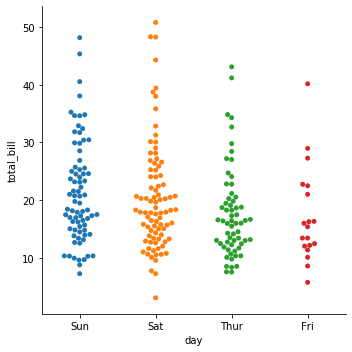

In [159]:
# invert the x,y to fix it
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

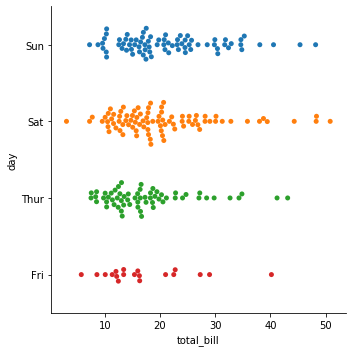

In [162]:
sns.catplot(x="total_bill", y="day", kind="swarm", data=tips)

### Distribution Plots
Swarm plots are good for approximating distributions, but we often want to have an exact description of the data distribution. For this, we can use box plots and variants thereof.

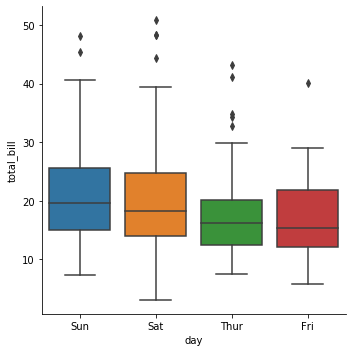

In [163]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

Boxplots encode valuable information about our distribution. For each subset of the data, i.e. each box, the following pieces of information are shown:
- The central line of each box represents the median value
- The top and bottom of the boxes are the $3^{rd}$ and $1^{st}$ quantile, respectively.
    - This means that 25% of all values are below the bottom line and 25% are above the top line, i.e. 50% of all values are within the colored region
- The whiskers denote the outlier limits. Any value between the whiskers is considered "normal"
- The points outside of the whiskers are outliers that may require special attention

The `hue` argument can be used to show additional, nested relationships

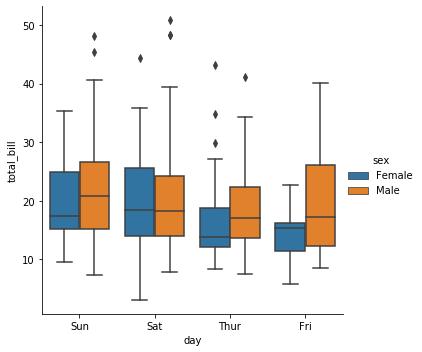

In [164]:
#hue to separate the boxplot
sns.catplot(x="day", y="total_bill", kind="box", hue="sex", data=tips)

Note that `hue` assumes a categorical variable when used on `catplot(...)` and `seaborn` will therefore automatically convert numerical variables into categorical ones.

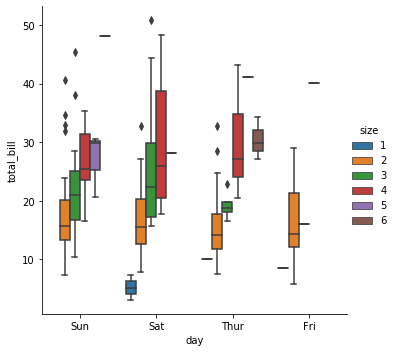

In [165]:
# hue=size
sns.catplot(x="day", y="total_bill", kind="box", hue="size", data=tips)

# 

When quantiles aren't enough, `seaborn` can also display a violin plot. This kind of plot estimates a density and plots it as a distribution

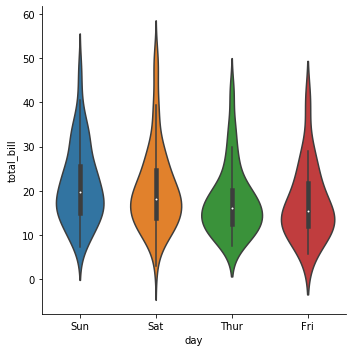

In [166]:
# kind=violin
sns.catplot(x="day", y="total_bill", kind="violin", data=tips)

If a variable has only two possible values and is mapped to the hue aesthetic, then `split=True` can be used to combine the two density estimates to compare them more easily.

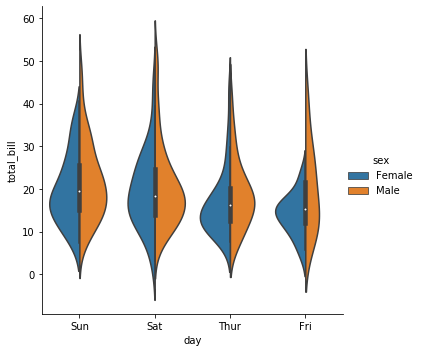

In [170]:
# split = true, hue=sex
sns.catplot(x="day", y="total_bill", kind="violin", 
            hue="sex", split=True, data=tips)

Violin plots estimate the density. This kernel density estimator (KDE) requires a parameter, called bandwidth, that determines how smooth or how detailed the density plot will be. Understanding violin plots can therefore be more difficult and potentially misleading.

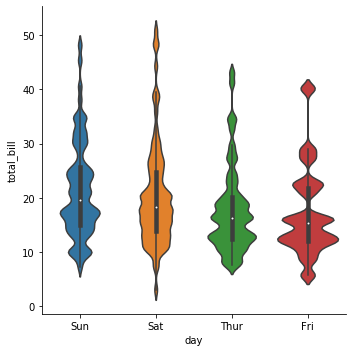

In [180]:
# bw=0.1
sns.catplot(x="day", y="total_bill", kind="violin", bw=0.1, data=tips)

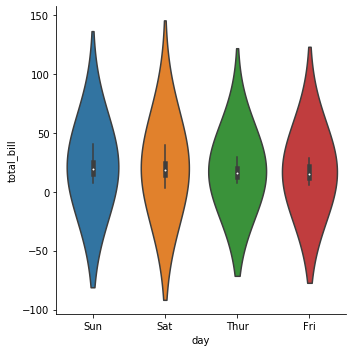

In [181]:
# bw=5 bad representation - information lost. negative bill etc.
sns.catplot(x="day", y="total_bill", kind="violin", bw=5, data=tips)

Violin plots automatically show the corresponding box plot stats inside. We can change this to either showing `sticks`, `points`, or nothing at all.

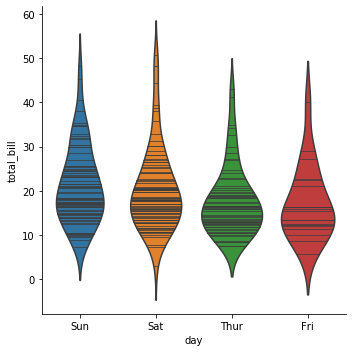

In [182]:
# inner= stick
sns.catplot(x="day", y="total_bill", kind="violin", 
            inner="stick", data=tips)

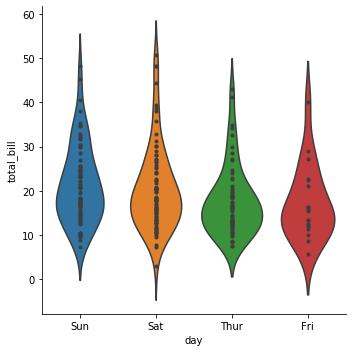

In [183]:
# inner=points
sns.catplot(x="day", y="total_bill", kind="violin", 
            inner="points", data=tips)

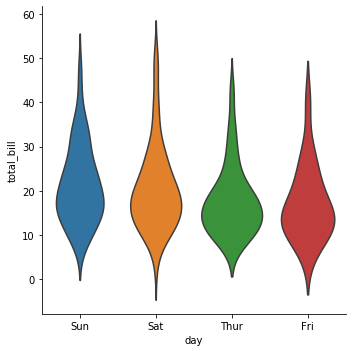

In [184]:
# inner = none
sns.catplot(x="day", y="total_bill", kind="violin", 
            inner=None, data=tips)

Like with line plots, we may be interested in summary statistics over our data. For this, we can use a bar plot. `seaborn` will compute a summary statistic, such as the mean, as well as confidence intervals for each individual category (denoted by the x-axis).

In [185]:
# titanic = sns.load_dataset("titanic")
titanic = pd.read_csv("data/titanic.csv")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


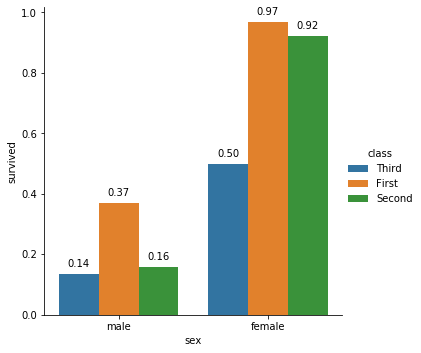

In [186]:
# Compute the mean survival rate for each sex and class as well as confidence intervals.
g = sns.catplot(x="sex", y="survived", hue="class", kind="bar", ci=None, data=titanic)

# to plot the values for each bar
ax = g.facet_axis(0,0) #separate according to multiple bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

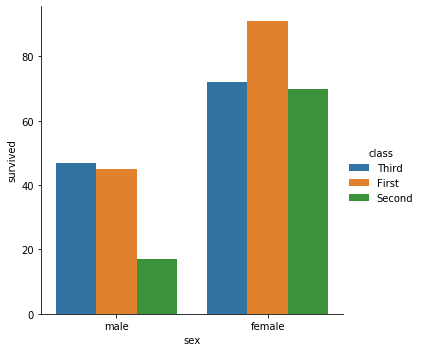

In [187]:
# Compute the total number of survivors for each sex and class as well as confidence intervals.

# if no annotate
# sum of survive
sns.catplot(x="sex", y="survived", hue="class", kind="bar", ci=None,
            estimator=np.sum, data=titanic)

If we're just interested in counting the number of occurances of a single variable, we can use `kind="count"`.

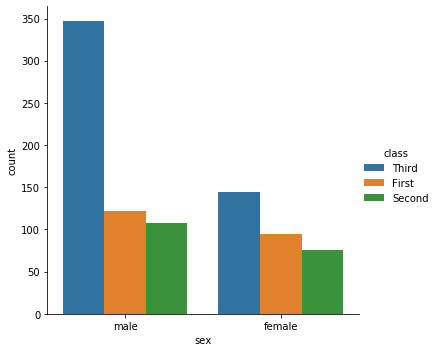

In [188]:
# Count the number of passengers by sex and class

# number of passangers, frequencey, so no Y
sns.catplot(x="sex", hue="class", kind="count", data=titanic)

An alternative to a barplot is a "point plot", which connects groups. This can be used to track psuedo-timeseries data that may only have a few categorical time points, e.g. sales data for 5 years. Notice how it connects data subgroups with the same value of the variable mapped to the `hue` aesthetic (`sex`).

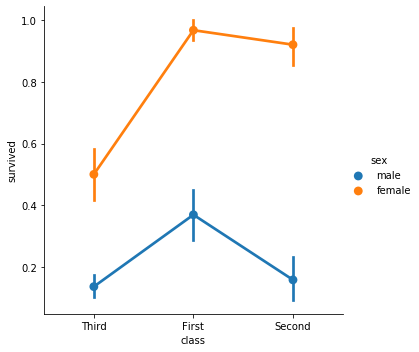

In [191]:
# kind = point
# usually used on time-series plot

sns.catplot(x="class", y="survived", hue="sex", kind="point", data=titanic)

As before, we can also change the estimator and confidence interval method for point plots.

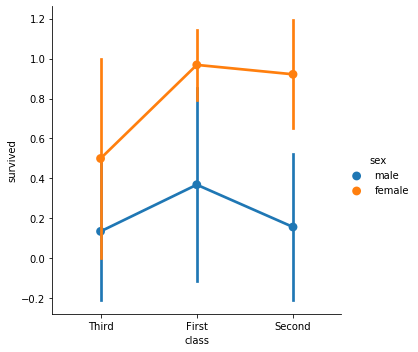

In [192]:
sns.catplot(x="class", y="survived", hue="sex", kind="point", 
            estimator=np.mean, ci="sd", data=titanic)

### Exercises

1. Load the `diamonds.csv` dataset and create a categorical scatter plot that relates the price to the cut

In [ ]:
###

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


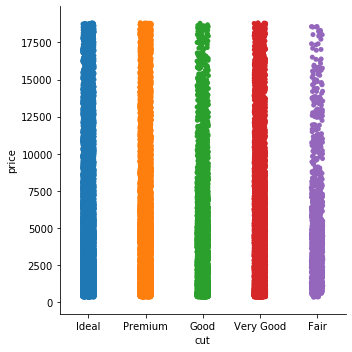

In [207]:
diamonds = pd.read_csv("data/diamonds.csv")
display(diamonds.head())
sns.catplot(x="cut",y="price",data= diamonds)

2. Change the jitter width of the previous plot so that the dot-columns are touching.

In [ ]:
###

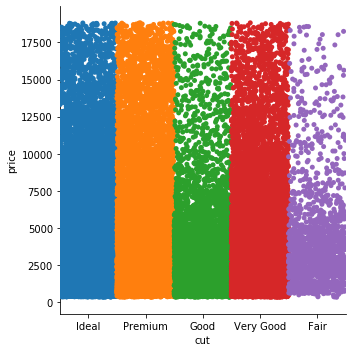

In [206]:
sns.catplot(x="cut",y="price",data= diamonds,jitter = 0.5)

3. This time, create a box plot that relates the carats to the clarity

In [ ]:
###

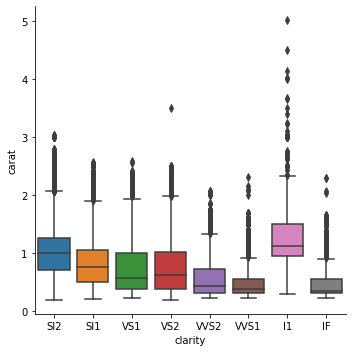

In [209]:
sns.catplot(x="clarity",y="carat",kind ="box" ,data= diamonds)

4. Create a subset of the diamonds data consisting of only diamonds with colors of "J" (worst) and "D" (best) and only with clarity "IF". 
  
  *Hint:* We can combine boolean masks for Pandas like so: `diamonds.loc[(condition1) & (condition2)]`
  
  Create a violin plot relating the price to the clarity and map the color to the `hue` aesthetic. Make sure the density estimates for each color are combined in each violin.

In [ ]:
###

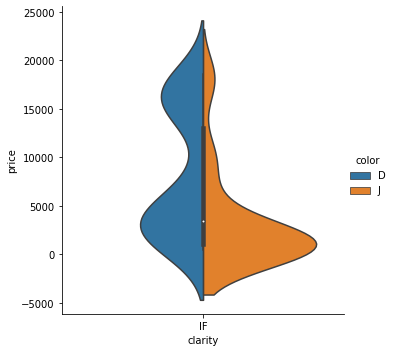

In [229]:
#Nik Faiz
df = diamonds.loc[((diamonds["color"] =='J') | (diamonds["color"] =='D'))
                  & (diamonds["clarity"] =='IF')]

sns.catplot( x="clarity",y="price",kind='violin',
            split = True,hue="color",data=df)

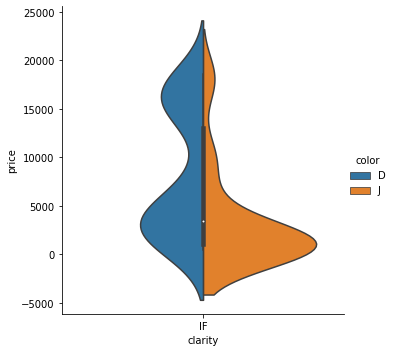

In [225]:
# Answer

new_diamonds = diamonds.loc[
    diamonds["color"].isin(("D","J")) &
    (diamonds['clarity']=='IF')
]

sns.catplot( x="clarity",y="price",kind='violin',
            split = True,hue="color",data=df)

5. Play with the bandwidth parameter (`bw`) for the previous plot. How can you interpret the plot for `bw=0.01`, `bw=0.1`, and `bw=1`?

In [ ]:
###

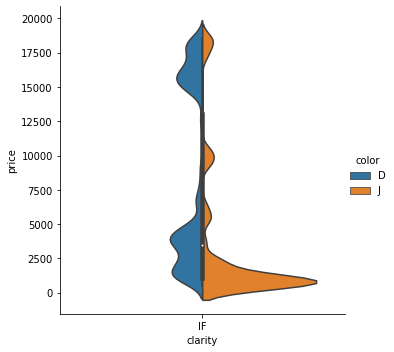

In [235]:
sns.catplot( x="clarity",y="price",kind='violin',
            split = True,hue="color",data=df, bw=.1)

6. Using the full diamond dataset again, use a bar plot to determine how many diamonds there are of each cut.

In [ ]:
###

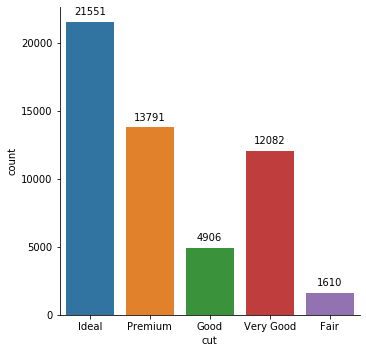

In [240]:
g = sns.catplot(x= 'cut',kind= 'count',data=diamonds)


# To show the value
ax = g.facet_axis(0,0) #separate according to multiple bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), ''), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

## Element Ordering
All of the above plots allow us to customize the order of elements, both on the axes as well as for the aesthetics. Naturally, the functions will only enable ordering aesthetics that are supported, e.g. `catplot(...)` has no `size_order` or `style_order` arguments and `relplot(...)` has no `order` argument as both axes depict continuous values.

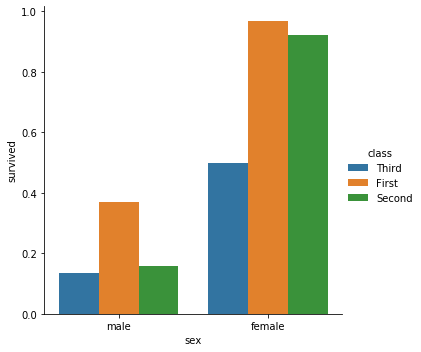

In [258]:
# Compute the mean survival rate for each sex and class as well as confidence intervals.

# order = ["female", "male"]
# can use for x axis and y axis (only for discrete value)
sns.catplot(x="sex", y="survived", hue="class", kind="bar", 
            order=["female", "male"], ci=None, data=titanic)

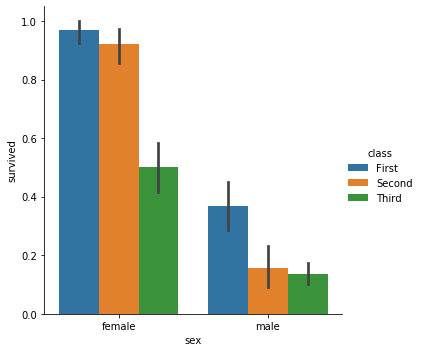

In [259]:
# hue_order
sns.catplot(x="sex", y="survived", hue="class", kind="bar", 
            order=["female", "male"], data=titanic, 
            hue_order=["First", "Second", "Third"])

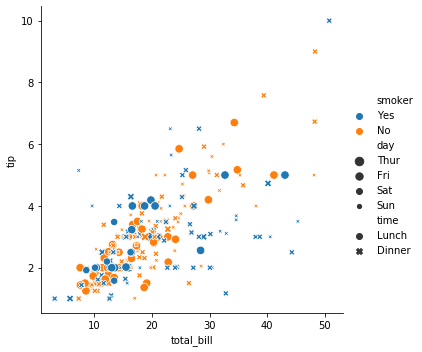

In [261]:
# style_order , size_order
sns.relplot(
    x="total_bill", y="tip", hue="smoker", size="day", style="time",
    style_order=["Lunch", "Dinner"], 
    size_order=["Thur", "Fri", "Sat", "Sun"], 
    hue_order=["Yes", "No"], data=tips)

## Facetting 
We can also instruct the functions `relplot(...)` and `catplot(...)` to **create multiple plots** if we simply have too much detail to show in one. The parameters `col=...` and `row=...` let us further split apart the data and show subsets in individual plots.

In [262]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


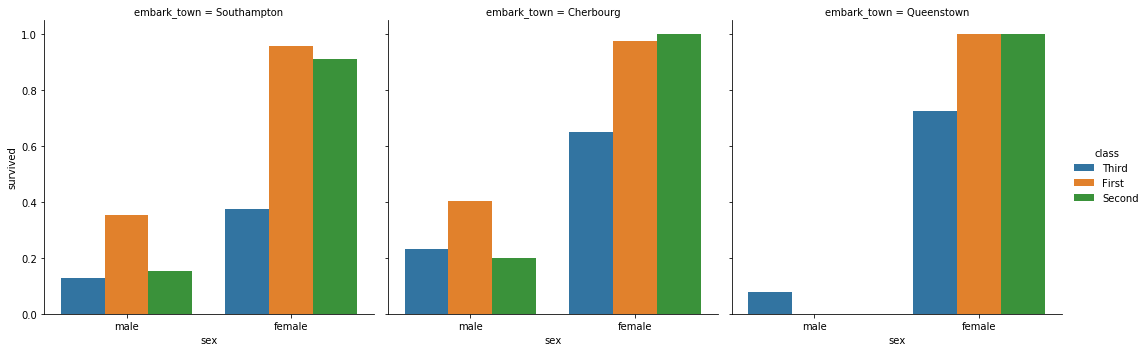

In [263]:
#  col= "embark_town"
fig = sns.catplot(x="sex", y="survived", hue="class", 
                  kind="bar", col="embark_town", ci=None,data=titanic)

In [264]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


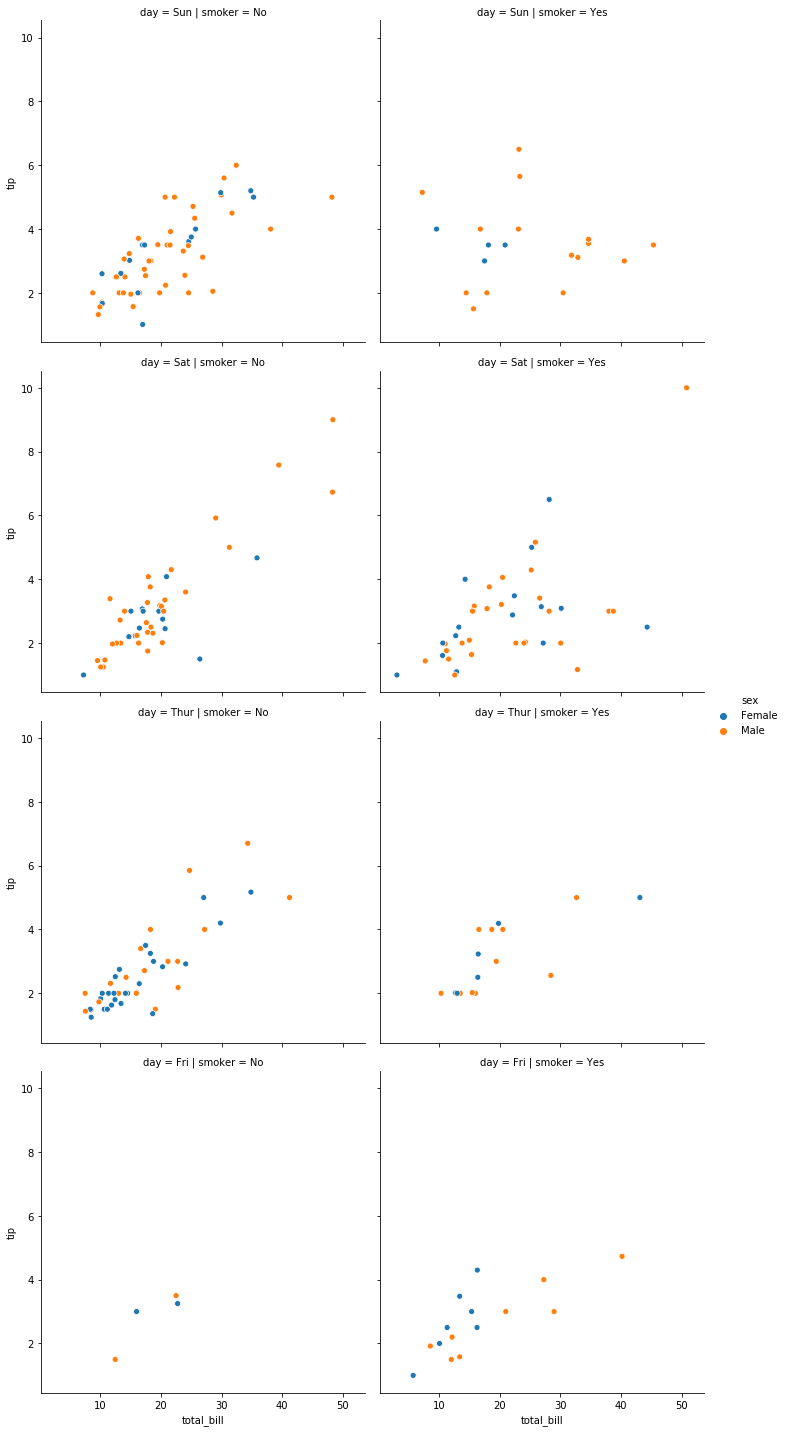

In [265]:
# row = "day", col="smoker"
sns.relplot(x="total_bill", y="tip", hue="sex",
            row="day", col="smoker", data=tips)

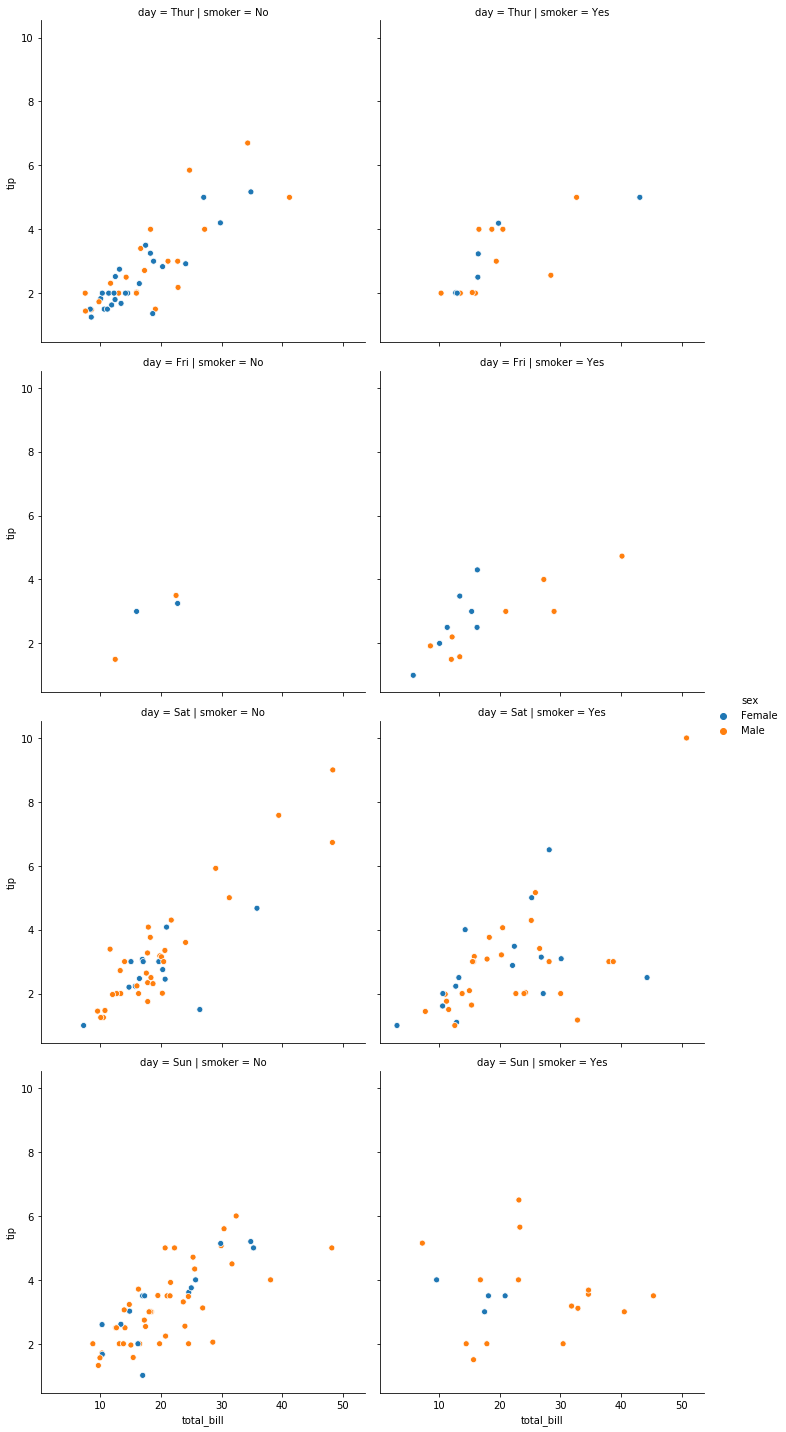

In [266]:
# row_order
sns.relplot(x="total_bill", y="tip", hue="sex",
            row="day", col="smoker", data=tips, 
            row_order=["Thur", "Fri", "Sat", "Sun"])

## Under the Hood
`seaborn` is a high-level interface for `matplotlib`. The two functions introduced here call other, intermediate functions, which in turn call `matplotlib` functions.

- `relplot(kind=...)`
    - **scatter**: `scatterplot()` --> `matplotlib.pyplot.scatter()`
    - **line**: `lineplot()` --> `matplotlib.pyplot.line()`
- `catplot(kind=...)`
    - **strip**: `stripplot()` --> Calls multiple `matplotlib` functions
    - **swarm**: `swarmplot()` --> Calls multiple `matplotlib` functions
    - **box**: `boxplot()` --> Calls `matplotlib.pyplot.boxplot()`
    - **violin**: `violinplot()` --> Calls multiple `matplotlib` functions
    - **bar**: `barplot()` --> Calls `matplotlib.pyplot.bar()`
    - **count**: `countplot()` --> Calls `matplotlib.pyplot.bar()`
    - **point**: `pointplot()` --> Calls multiple `matplotlib` functions
    
`seaborn` is essentially a "convenience" to make `matplotlib` more accessible.

## Customizing Plots

### Plot Text and Axis Labels
Customizing the text of axis labels is unfortunately not as intuitive as building the plots. This is because `seaborn` builds heavily on `matplotlib` but attempts to reduce the fine granularity of building a plot with the latter. For example, to create the facetted plots above using `matplotlib`, we would have to subset the data into all possible variants, build each individual plot, arrange them in a grid, and then add the legend and axis titles. `seaborn` makes this step somewhat easier, but cannot get around this granularity when it comes to customizing plots.

**Title**

Text(0.5, 0.98, 'Titanic Survivors')

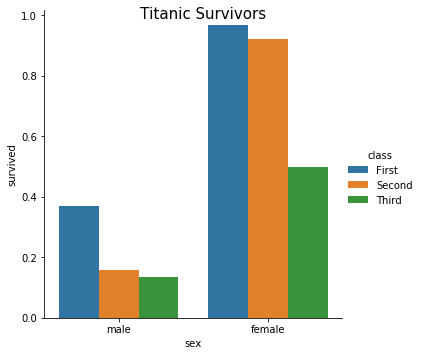

In [271]:
# Look at documentation for more info

# Add title (fontsize, color)
myFigure = sns.catplot(
    x="sex", y="survived", hue="class", kind="bar",
    hue_order=["First", "Second", "Third"], ci=None, data=titanic)
myFigure.fig.suptitle("Titanic Survivors", fontsize=15)

**Legend**

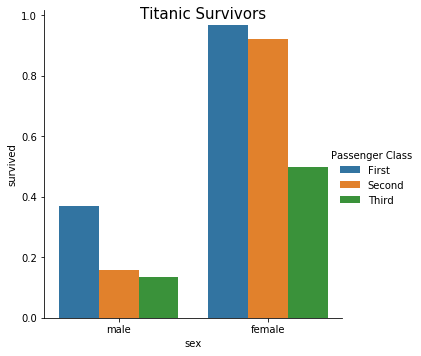

In [272]:
myFigure._legend.set_title("Passenger Class")
myFigure.fig

Legend labels are stored as `Text(...)` elements

In [274]:
# Pulling out the legends
myFigure._legend.texts

[Text(0, 0, 'First'), Text(0, 0, 'Second'), Text(0, 0, 'Third')]

We can change these by calling `*.set_text(...)` on each of them

In [275]:
# Manually assign them
myFigure._legend.texts[0].set_text("1st")
myFigure._legend.texts[1].set_text("2nd")
myFigure._legend.texts[2].set_text("3rd")
myFigure._legend.texts

[Text(0, 0, '1st'), Text(0, 0, '2nd'), Text(0, 0, '3rd')]

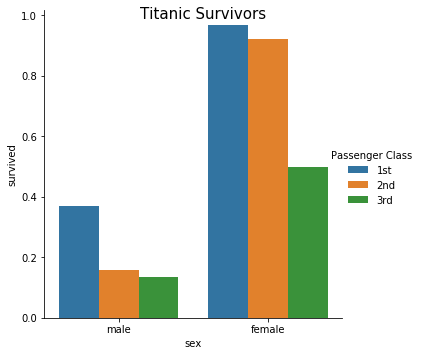

In [276]:
myFigure.fig

**Axis Labels**

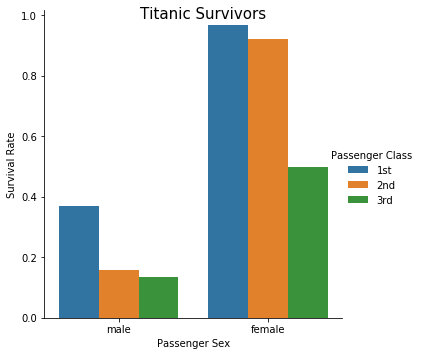

In [278]:
# Chang axis label (x_ver, y_var)
myFigure.set_axis_labels(x_var="Passenger Sex", y_var="Survival Rate")
myFigure.fig

**Axis Tick Text**

For this we're going to "cheat" and make use of some underlying `matplotlib` functions. First, we need to define a function that takes a number between 0 and 1 and transforms it into a percent-string, e.g. `0.2 --> 20%`. Then we're going to apply it to each of the y-tick labels.

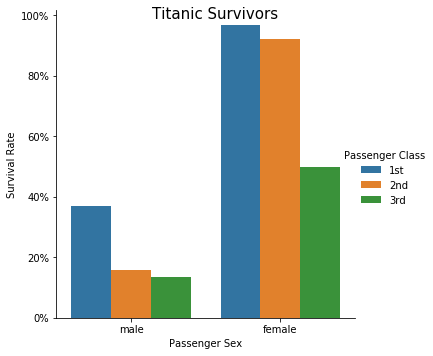

In [280]:
# Note that this function MUST take two arguments, the value of the tick label 
# and the index of the tick label. Note that we don't have to actually use both of
# them

# chg the axis scale
import matplotlib.pyplot as plt

def percent_formatter(num, tick_num):
    return "{:.0f}%".format(num*100)

myFigure.ax.yaxis.set_major_formatter(
    plt.FuncFormatter(percent_formatter))
myFigure.fig

Take note that categorical variables are stored as numbers internally. This means that attempting to capitalize the x-axis tick labels like above would result in an error. It is better practice to format categorical variables within your data. This way, you won't have to repeat the same formatting steps every time you create new visualizations from the data (or edit existing ones).

If you must format them in your visualization code, you can set the value of categorical tick labels as follows:

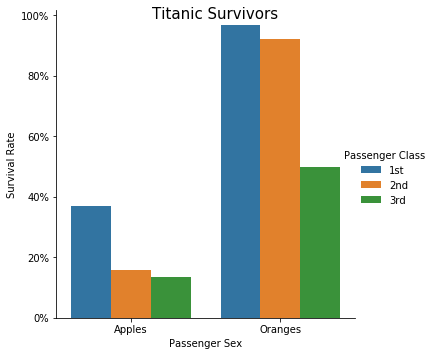

In [283]:
# The tick labels stored as numbers internally

# to chg the tick label only, not the value
myFigure.set_xticklabels(labels=["Apples", "Oranges"])
myFigure.fig

**Rotate Tick Labels**

In some cases, tick labels may be too dense and must be rotated

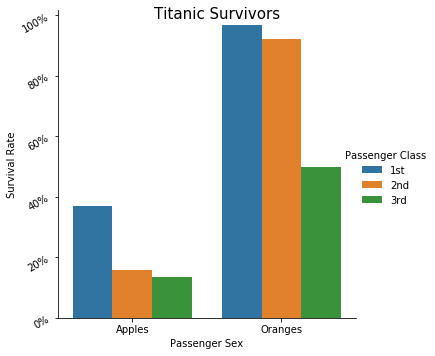

In [284]:
# rotate tick labels
myFigure.set_yticklabels(rotation=30)
myFigure.fig

### Axis Limits
We cheat again and use `matplotlib` to set our axis limits

Text(0.5, 1, 'Total tip for restaurant A')

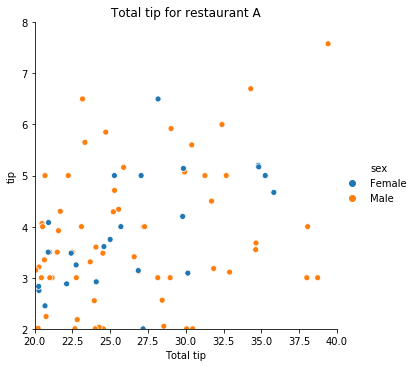

In [287]:
# chg xlimit and ylimit
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)
plt.xlim(20, 40)
plt.ylim(2, 8)

#using plt
plt.xlabel("Bill Total")
plt.xlabel("Total tip")
plt.title("Total tip for restaurant A")

### Color
There are far more methods of creating and choosing color palettes in `seaborn` than could possibly be shown here.

In general, we set the colors of our plot with the parameter `palette=...`. The simplest way to do this is to define a dictionary relating the aesthetic names (here the passenger class) to colors. The colors can be given either as a string (insofar as the color is known to seaborn), in hexadecimal format indicating the color channel intensities (`#RRGGBB`), or as a tuple/list with 3 values indicating the color mixing (`[r, g, b]`, values should be between 0 and 1)

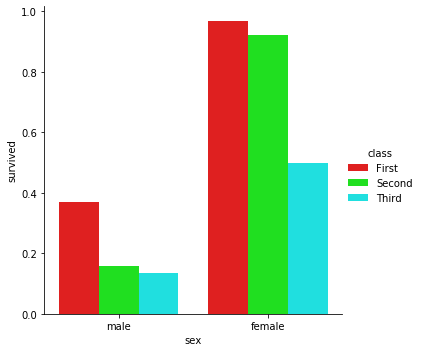

In [288]:
# palette = 
sns.catplot(
    x="sex", y="survived", hue="class", kind="bar", ci=None,
    hue_order=["First", "Second", "Third"], 
    palette={"First": "red", "Second": "#00FF00", "Third": (0, 1, 1)},
    data=titanic)

The palette doesn't have to be a dictionary.

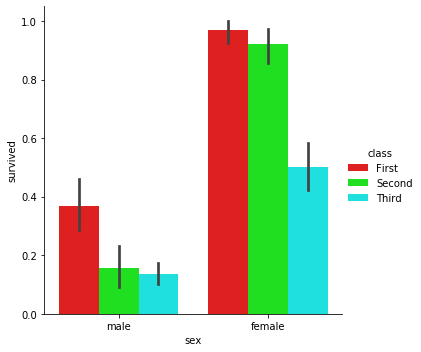

In [290]:
# palette = 
titanic = pd.read_csv("data/titanic.csv")
sns.catplot(
    x="sex", y="survived", hue="class", kind="bar",
    hue_order=["First", "Second", "Third"], 
    palette=["red", "#00FF00", (0, 1, 1)],
    data=titanic)

This becomes tiresome for many categories so `seaborn` offers several functions to generate color palettes automatically. Some of these include:

- `sns.cubehelix_palette(...)`
- `sns.diverging_palette(...)`
- `sns.dark_palette(...)`
- Any of the [ColorBrewer](http://colorbrewer2.org) presets
- ... and many more

Rather than try to learn each one of these individually, though, `seaborn` offers an incredibly useful tool: interactive widgets that let you design a palette. The 5 widgets can be called via:

- sns.choose_colorbrewer_palette(...)
- sns.choose_cubehelix_palette(...)
- sns.choose_dark_palette(...)
- sns.choose_light_palette(...)
- sns.choose_diverging_palette(...)

Note that these widgets will only work in Jupyter.

In [291]:
myPalette = sns.choose_colorbrewer_palette("qualitative")

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

## Themes
Beyond color, `seaborn` also has support for themes. There are five built-in seaborn themes: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`. They can be invoked with `sns.set_style(...)`

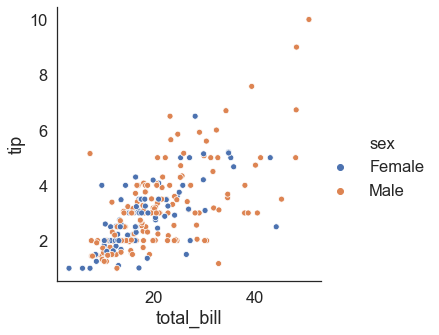

In [311]:
# Themes
sns.set_style("dark")

sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)

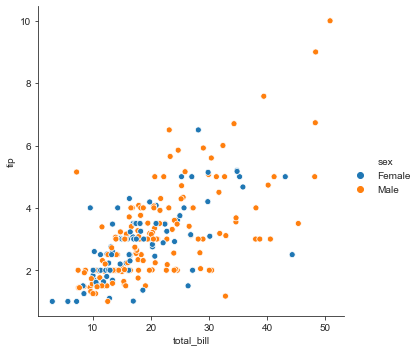

In [294]:
sns.set_style("ticks")
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)

We can edit these styles to our liking. Note that the floating point numbers are actually strings!

In [295]:
# See current style details
sns.set_style("ticks")
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

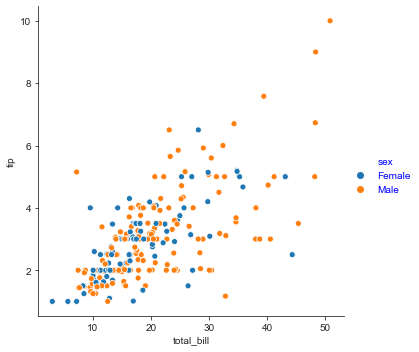

In [296]:
# Overwrite styles
sns.set_style("ticks", {"text.color": 'blue'})
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)

Lastly, we can also use `sns.set(...)` to tweak our plots, such as font size scaling.

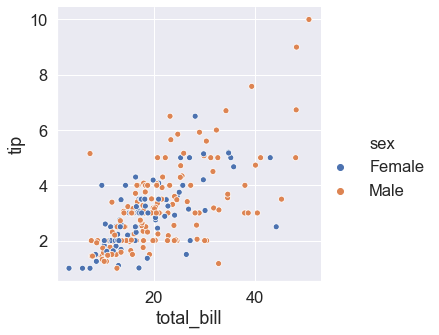

In [297]:
# Overwrite styles
sns.set(font_scale=1.5)
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)

In [ ]:
# Reset to orriginals

sns.reset_orig()

## Saving Plots
Typically, an analysis pipeline won't run in Jupyter, or any other interactive environment, but as a script that generates a report. We can use `seaborn` to this end by saving our plots.

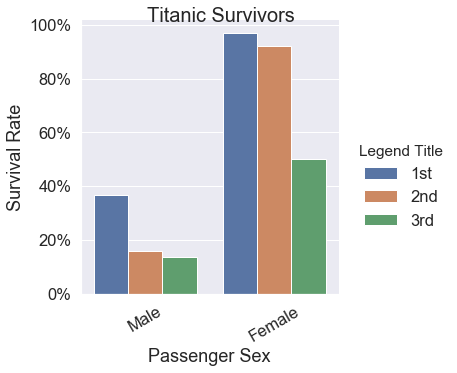

In [299]:
myFigure = sns.catplot(
    x="sex", y="survived", hue="class", kind="bar",
    hue_order=["First", "Second", "Third"], 
    order=["male", "female"], data=titanic, ci=None)
myFigure.fig.suptitle("Titanic Survivors", fontsize=20)
myFigure._legend.set_title("Legend Title")
myFigure._legend.texts[0].set_text("1st")
myFigure._legend.texts[1].set_text("2nd")
myFigure._legend.texts[2].set_text("3rd")
myFigure.set_axis_labels(x_var="Passenger Sex", y_var="Survival Rate")
myFigure.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, y: "{:.0f}%".format(x*100)))
myFigure.set_xticklabels(labels=["Male", "Female"])
myFigure.set_xticklabels(rotation=30)

# Save the plot in all its glory
myFigure.savefig("myFirstFigure.png")

`seaborn` supports saving both in bitmap format, e.g. PNG, as well as in vector format, e.g. PDF.

## Exercises

1. Using the full diamond dataset again, use a bar plot to determine how many dimaonds there are of each clarity. Create facets for the cut (columns) and color (rows)

In [ ]:
###

In [300]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


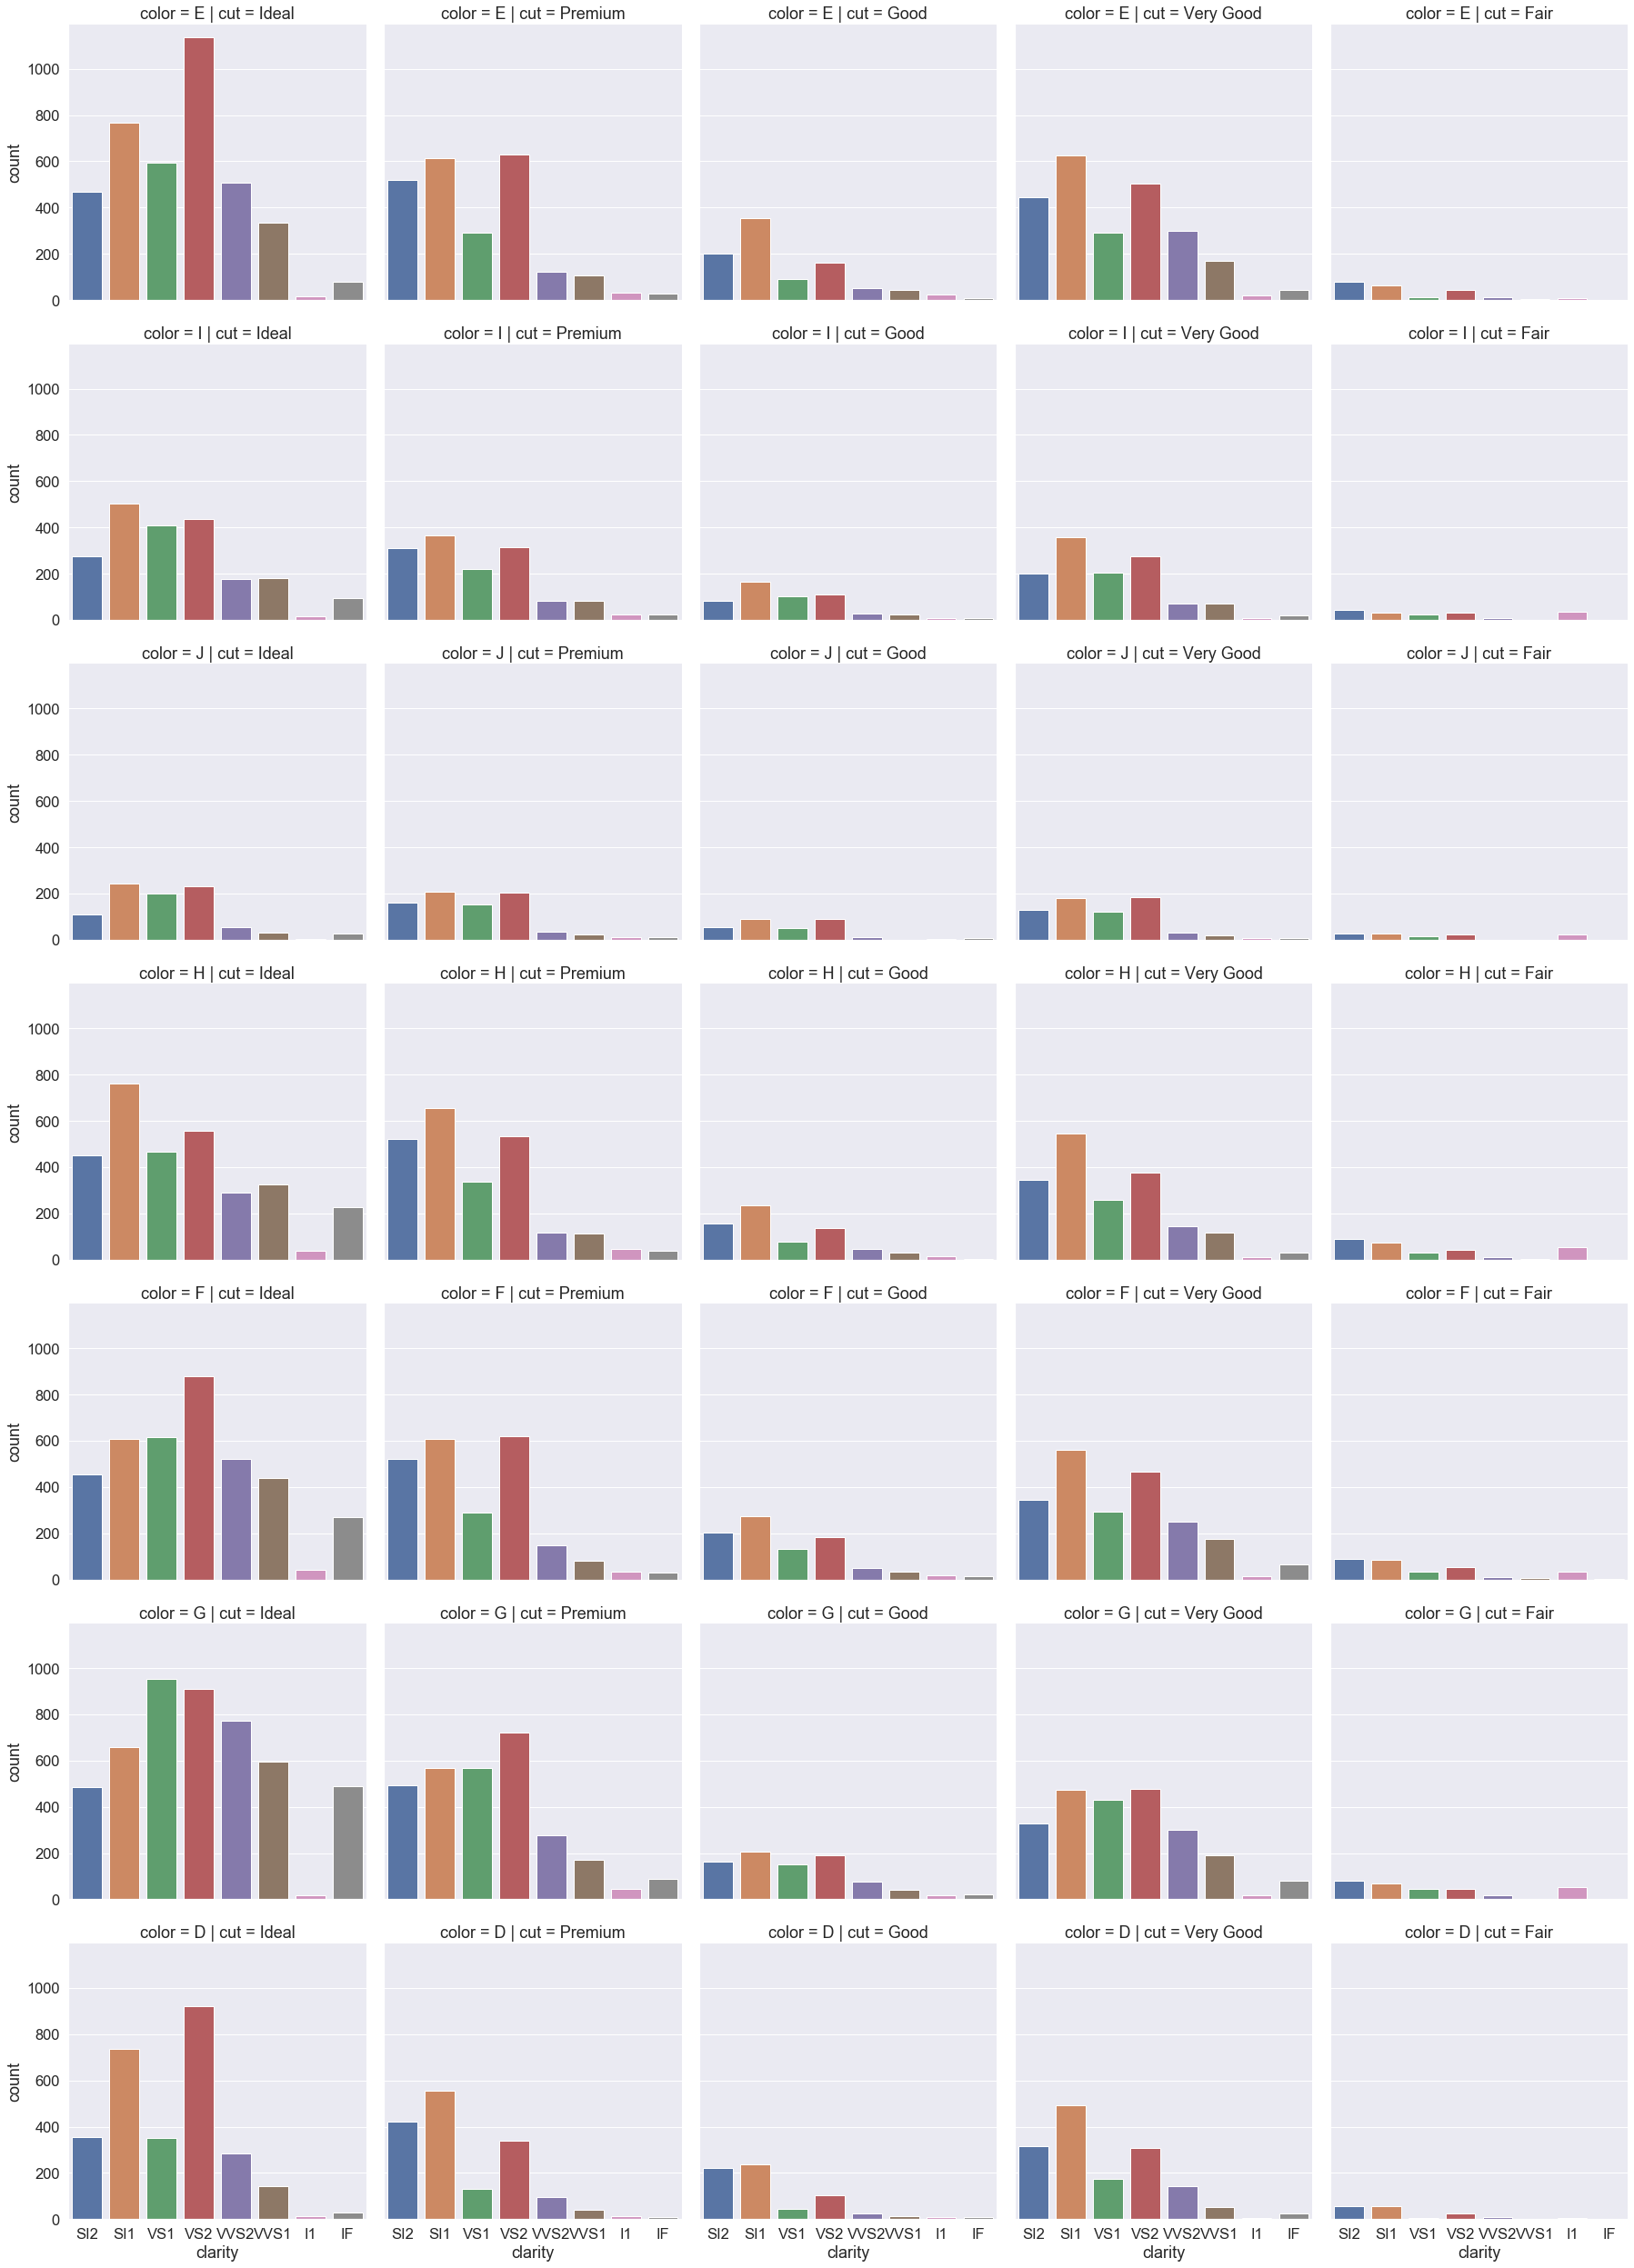

In [302]:
sns.catplot(x="clarity", kind="count",
            data= diamonds,col="cut",row="color")

2. Create a box plot that relates the carats to the clarity and place the boxes in the correct order (I1 , SI2, SI1, VS2, VS1, VVS2, VVS1, IF)

In [ ]:
###

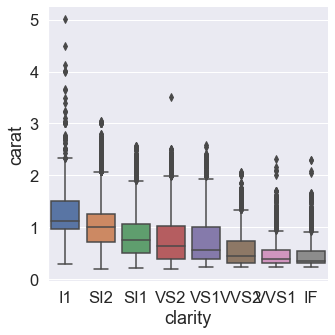

In [307]:
sns.catplot(data=diamonds,x= "clarity", y="carat",kind="box",
            order= ["I1" , "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])

3. Plot the relationship between the `x` and `y` columns of the `diamonds` dataframe. Limit the x-axis to the interval \[3, 11] and the y-axis to the interval \[0, 15] to remove outliers

In [315]:
###


(0, 15)

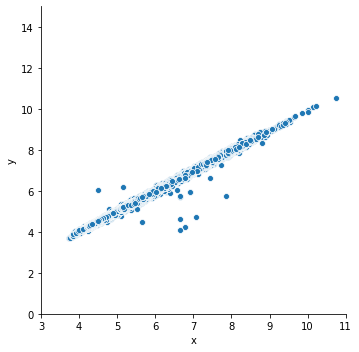

In [314]:

sns.relplot(data=diamonds,x= "x", y="y")
plt.xlim(3, 11)
plt.ylim(0, 15)

4. Plot the relationship between the price and the cut as a boxplot. Format the y-axis tick labels to include a currency symbol and to display prices in thousands, e.g. 12500 should be displayed as "\$12.5k".

  **TRY THIS**: "\$0.0k" is a little silly to display. Alter the function so that in case the y-value == 0, it only displays "\\$0"

In [ ]:
###

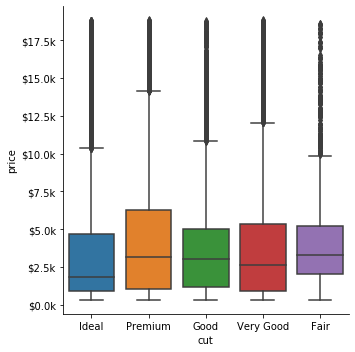

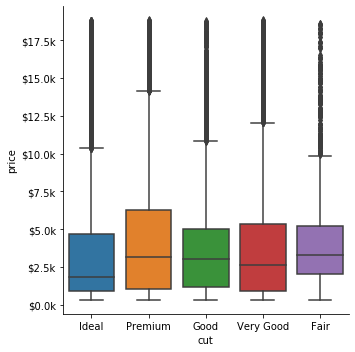

In [323]:
myFigure = sns.catplot(data=diamonds,x= "cut", y="price", kind="box")

import matplotlib.pyplot as plt

def percent_formatter(num, tick_num):
    return "${:.1f}k".format(num/1000)

myFigure.ax.yaxis.set_major_formatter(
    plt.FuncFormatter(percent_formatter))
myFigure.fig

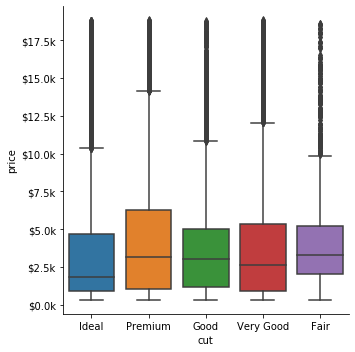

In [326]:
# Other answer
myFigure = sns.catplot(data=diamonds,x= "cut", y="price", kind="box")
myFigure.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, y: "${:.1f}k".format(x/1000)))

4. Load the `exercise.csv` dataset. 
  1. Plot the relationship between the pulse and diet as a boxplot. 
  2. Map the kind of exercise to the `hue`
  3. Facet the data into columns so that we have one plot for each timepoint

In [ ]:
###
x- diet (cat)
y=pulse
col time
row kind?



In [328]:
exercise = pd.read_csv("data/exercise.csv")
exercise.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


Text(0.5, 0.98, 'Diet vs Pulse')

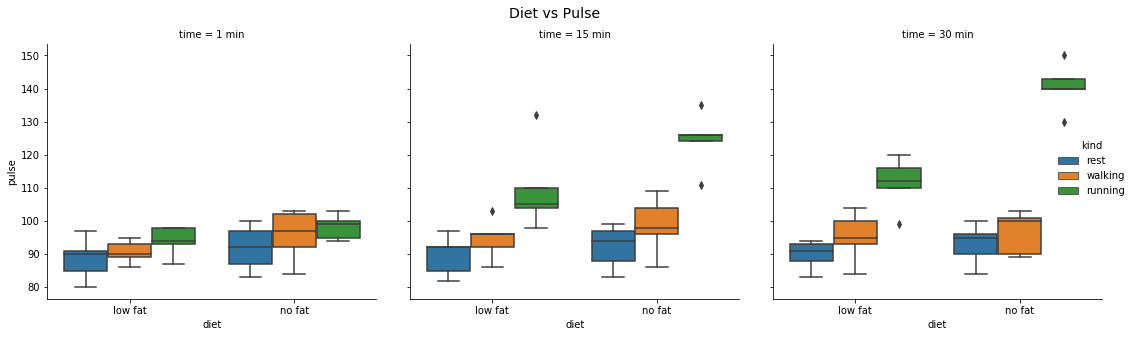

In [337]:
figure= sns.catplot(x="diet",y="pulse",hue="kind",kind= "box",col="time",data= exercise)

# if want to put more
plt.tight_layout(pad=3)
figure.fig.suptitle("Diet vs Pulse",fontsize=14)
